In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
m=10
s=0
for n in range(0,m):
    s=s+np.cos(n*np.pi)

In [3]:
def parker(Q,a,rho,cp,e,x,t,m=100):
    pi=np.pi
    s=0
    for n in range(1,m):
        s=s+np.cos(n*np.pi*x/e)*np.exp(-(n**2*pi**2)/(e**2)*a*t)
    return Q/(rho*cp*e)*(1+2*s)
parker(1,2,3,4,5,6,7)

0.01655939126961223

Text(0.5, 0, 't')

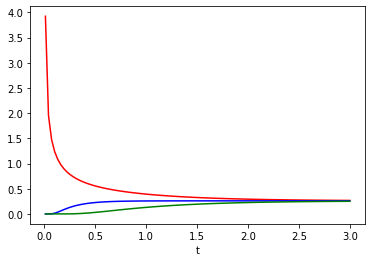

In [4]:
t=np.linspace(0.01,3,100)
Q=5000
rho=8238
cp=468
e=0.005
a=13.4/(rho*cp)
plt.plot(t,parker(Q,a,rho,cp,e,0,t), 'r')
plt.plot(t,parker(Q,a,rho,cp,e,e/2,t),'b')
plt.plot(t,parker(Q,a,rho,cp,e,e,t),'g')
plt.xlabel("t")

Text(0.5, 0, 'x')

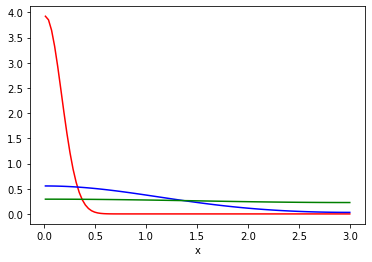

In [5]:
x=np.linspace(0,e,100)
Q=5000
rho=8238
cp=468
e=0.005
a=13.4/(rho*cp)
plt.plot(t,parker(Q,a,rho,cp,e,x,0.01), 'r')
plt.plot(t,parker(Q,a,rho,cp,e,x,0.5),'b')
plt.plot(t,parker(Q,a,rho,cp,e,x,2),'g')
plt.xlabel("x")

In [6]:
t, dexp= np.loadtxt("flash.txt", unpack=True)

In [7]:
def residue(param):
    return parker(param[0], param[1],rho,cp,e,e,t)-dexp

In [8]:
Q0=100
a0=1e-6
param_deb=(Q0,a0)
LM=op.leastsq(residue, param_deb, full_output=1)
param = LM[0]
print("parameter vector: ", param)
mat_cov = LM[1]
print(" \n\n Covariance matrix: \n\n ", mat_cov)
#Determination of correlation matrix
nnn=2
corre=np.zeros((nnn,nnn))
for i in range(0,nnn):
    for j in range(0,nnn):
        corre[i,j]=mat_cov[i,j]/(mat_cov[i,i]*mat_cov[j,j])**(0.5)
print(" \n\n Correlation matrix \n\n", corre)

parameter vector:  [4.99583210e+03 3.52700794e-06]
 

 Covariance matrix: 

  [[ 3.37850979e+06 -3.64616963e-03]
 [-3.64616963e-03  1.47128893e-11]]
 

 Correlation matrix 

 [[ 1.         -0.51716044]
 [-0.51716044  1.        ]]


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


Text(0, 0.5, 'Temperature (K)')

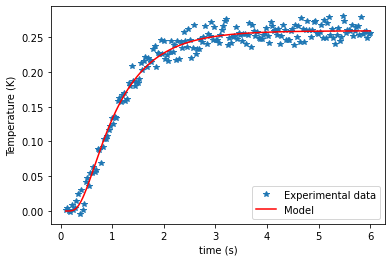

In [9]:
#Plot experimental data
plt.plot(t,dexp,'*')
plt.plot(t, parker(param[0],param[1],rho,cp,e,e,t),'r')
plt.legend(['Experimental data','Model'])
plt.xlabel("time (s)")
plt.ylabel("Temperature (K)")

In [10]:
#c is the model, i think is parker
N= len(dexp)
sensa=param[1]*(parker(param[0],param[1]*1.001,rho,cp,e,e,t)-parker(param[0],param[1],rho,cp,e,e,t))/(0.001*param[1])
sensQ=param[0]*(parker(param[0]*1.001,param[1],rho,cp,e,e,t)-parker(param[0],param[1],rho,cp,e,e,t))/(0.001*param[0])

Text(0, 0.5, 'Temperature (K)')

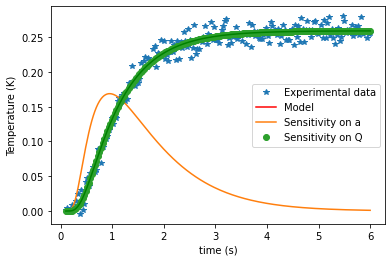

In [11]:
plt.plot(t,dexp,'*')
plt.plot(t, parker(param[0],param[1],rho,cp,e,e,t),'r')
plt.plot(t, sensa)
plt.plot(t, sensQ,'o')
plt.plot(t, parker(param[0],param[1],rho,cp,e,e,t),'g')
plt.legend(['Experimental data','Model', 'Sensitivity on a','Sensitivity on Q'])
plt.xlabel("time (s)")
plt.ylabel("Temperature (K)")

In [12]:
X = np.c_[sensa, sensQ]
Hessian = np.linalg.inv(np.dot(X.T,X))
ss = np.sqrt((sum(residue(param)))**2/(N-2))
Cov_Matrix = Hessian*ss**2
Cov_Matrix

array([[ 1.61715695e-06, -2.82565937e-07],
       [-2.82565937e-07,  1.84809831e-07]])

In [13]:
unc_a, unc_Q = np.diag(Cov_Matrix)

In [14]:
beta=np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)

In [17]:
print("previous param: ", param)
NNN=len(dexp)
nn=0
Cd=np.eye(NNN)
while nn<10:
    dtheo=parker(param[0],param[1],rho,cp,e,e,t)
    residues=dexp-dtheo
    
    temp1=parker(param[0]*1.001,param[1],rho,cp,e,e,t)
    sens_Q=(temp1-dtheo)/(0.001*param[0])
    temp2=parker(param[0],param[1]*1.001,rho,cp,e,e,t)
    sens_a=(temp2-dtheo)/(0.001*param[1])
    
    X=np.c_[sens_Q, sens_a]
    temp1=np.dot(X.T, np.linalg.inv(Cd))
    temp=np.linalg.inv(np.dot(temp1, X))
    cor=np.dot(temp,np.dot(temp1, residue))
    param[0]=param[0]+cor[0]
    param[1]=param[1]+cor[1]
    nn=nn+1
print("New param values: ", param)

previous param:  [4.99583210e+03 3.52700794e-06]


TypeError: unsupported operand type(s) for *: 'float' and 'function'